In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading CSV file
df=pd.read_csv('dataset.csv')

# Data Analysis

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Feature information

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Checking null or NA values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.shape

(303, 14)

In [30]:
#Correlation of features
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Data Visualization

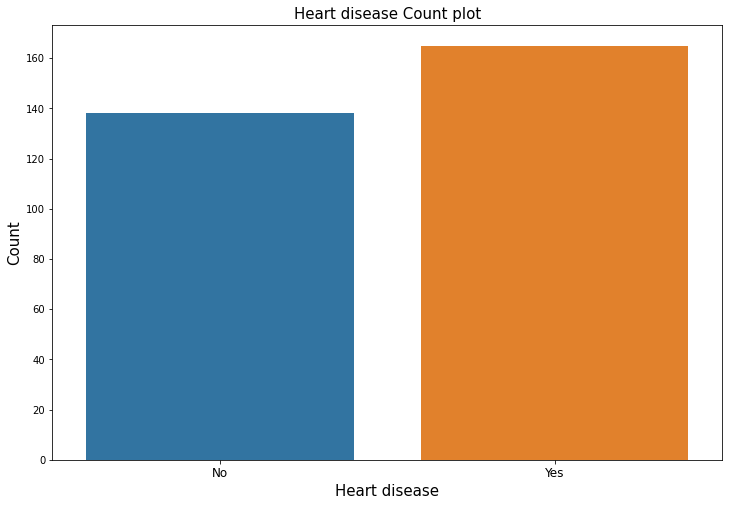

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='target')
plt.xlabel('Heart disease',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Heart disease Count plot',fontsize=15)
plt.xticks([0,1], ['No','Yes'],fontsize=12)
plt.show()

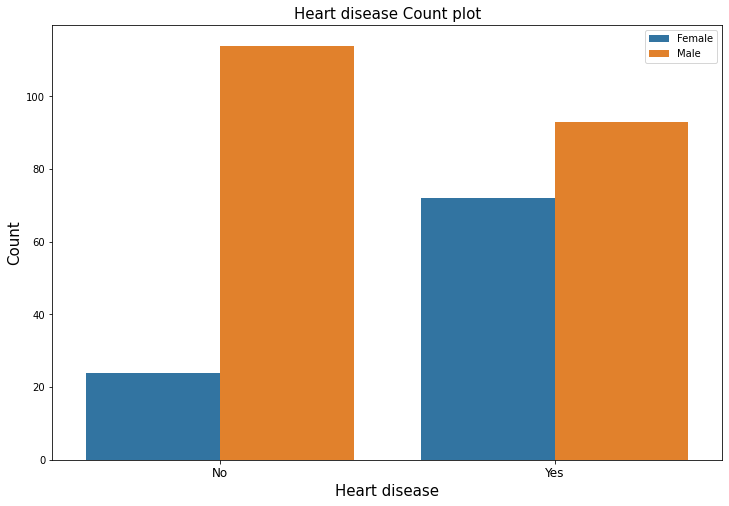

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='target',hue='sex')
plt.xlabel('Heart disease',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Heart disease Count plot',fontsize=15)
plt.legend(labels=['Female', 'Male'])
plt.xticks([0,1], ['No','Yes'],fontsize=12)
plt.show()

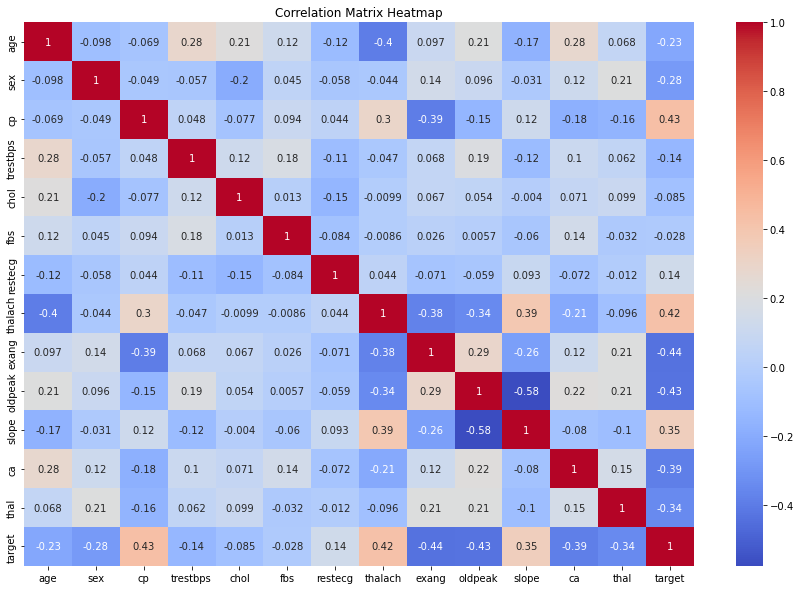

In [33]:
#Correlation of features
corr_matrix=df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model Building

In [35]:
x=df.iloc[:,:-1]
y=df['target']

In [36]:
#Dividing data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
#Scaling data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [54]:
#Logistic Regression

lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

lr_confusion_matrix=confusion_matrix(y_test,y_pred_lr)
lr_accuracy_score=accuracy_score(y_test,y_pred_lr)

print('Accuracy Score of Logistic regression model:',lr_accuracy_score)
print('Confusion Matrix of Logistic regression model:\n',lr_confusion_matrix)

Accuracy Score of Logistic regression model: 0.8131868131868132
Confusion Matrix of Logistic regression model:
 [[32  9]
 [ 8 42]]


In [56]:
#Decision Tree Classifier

dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

dt_confusion_matrix=confusion_matrix(y_test,y_pred_dt)
dt_accuracy_score=accuracy_score(y_test,y_pred_dt)

print('Accuracy Score of Decision Tree Classifier model:',dt_accuracy_score)
print('Confusion Matrix of Decision Tree Classifier model:\n',dt_confusion_matrix)

Accuracy Score of Decision Tree Classifier model: 0.7252747252747253
Confusion Matrix of Decision Tree Classifier model:
 [[32  9]
 [16 34]]


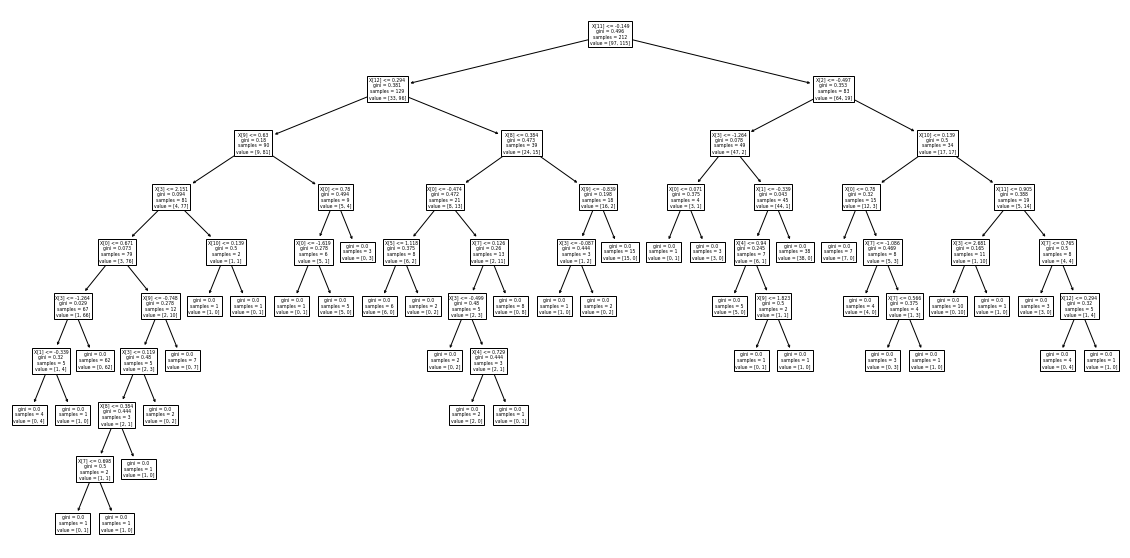

In [67]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt, ax=ax)
plt.show()

In [68]:
#Random Forest Classifier

rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

rf_confusion_matrix=confusion_matrix(y_test,y_pred_rf)
rf_accuracy_score=accuracy_score(y_test,y_pred_rf)

print('Accuracy Score of Random Forest Classifier model:',rf_accuracy_score)
print('Confusion Matrix of Random Forest Classifier model:\n',rf_confusion_matrix)

Accuracy Score of Random Forest Classifier model: 0.8241758241758241
Confusion Matrix of Random Forest Classifier model:
 [[32  9]
 [ 7 43]]


In [70]:
lr_classification_report=classification_report(y_test,y_pred_lr)
dt_classification_report=classification_report(y_test,y_pred_dt)
rf_classification_report=classification_report(y_test,y_pred_rf)

print('classification_report of Logistic regression model:\n',lr_classification_report,'\n')
print('classification_report of Decision Tree Classifier model:\n',dt_classification_report,'\n')
print('classification_report of Random Forest Classifier model:\n',rf_classification_report,'\n')

classification_report of Logistic regression model:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91
 

classification_report of Decision Tree Classifier model:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        41
           1       0.79      0.68      0.73        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.73        91
 

classification_report of Random Forest Classifier model:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accur

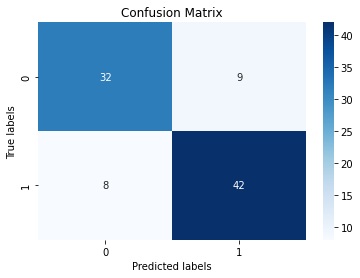

In [77]:
#Logistic Regressor

sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

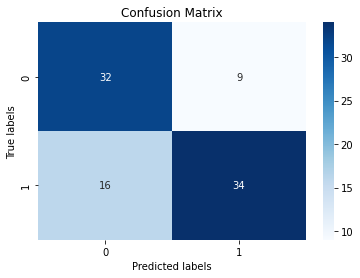

In [78]:
#Decision Tree Classifier

sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

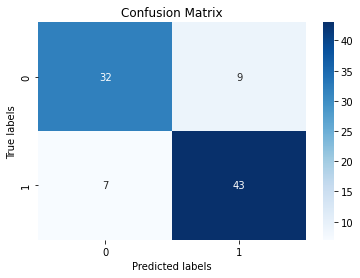

In [79]:
#random forest Classifier

sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [80]:
#As per accuracy Random forest classifier model has highest accuracy